In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [3]:
file='/home/jstiles4/clim680_dataset/ERA5_Reanalysis_Precip_dataset.grib'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:     (time: 252, latitude: 41, longitude: 53)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude   (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-10-13T14:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
dg_tp=ds.groupby('time.month').mean()
dg_tp

<xarray.Dataset>
Dimensions:    (latitude: 41, longitude: 53, month: 12)
Coordinates:
    number     int64 0
    step       timedelta64[ns] 12:00:00
    surface    float64 0.0
  * latitude   (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude  (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp         (month, latitude, longitude) float32 0.001482 ... 0.008068

Text(0.5, 0.98, 'Precipitation (mm/day)')

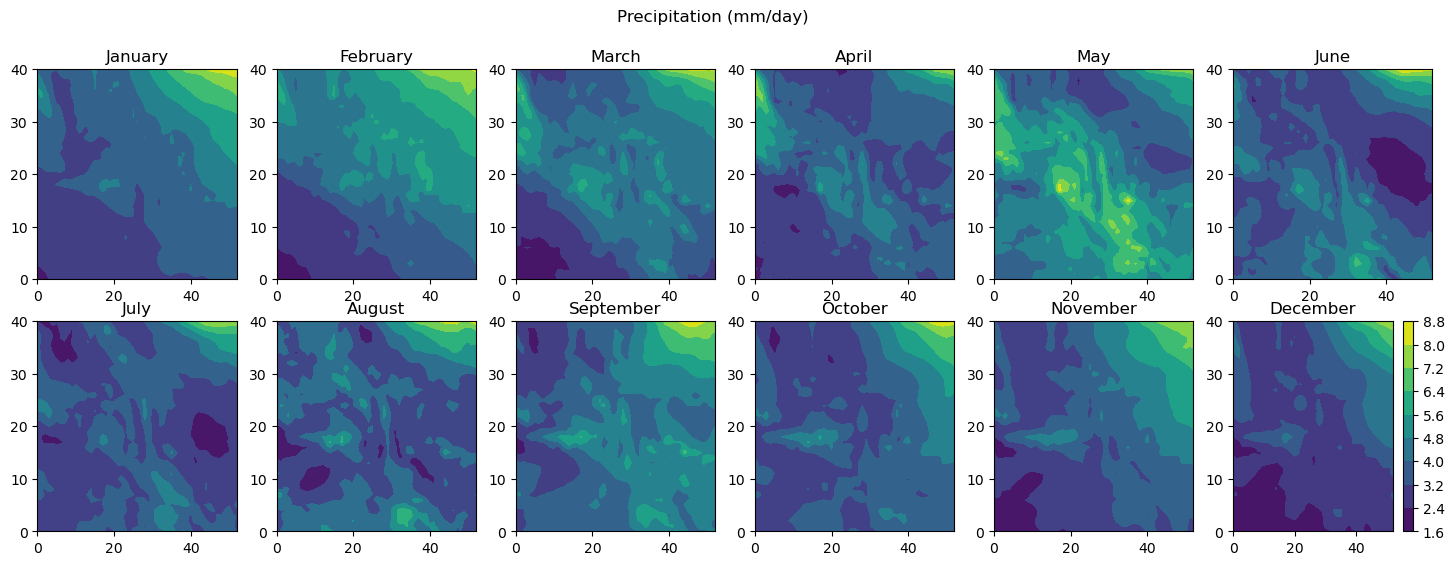

In [5]:
fig = plt.figure(figsize=(18,6))
plt.subplot(2,6,1)
plt.contourf((dg_tp['tp']*1000).sel(month=1))
plt.title('January')
plt.subplot(2,6,2)
plt.contourf((dg_tp['tp']*1000).sel(month=2))
plt.title('February')
plt.subplot(2,6,3)
plt.contourf((dg_tp['tp']*1000).sel(month=3))
plt.title('March')
plt.subplot(2,6,4)
plt.contourf((dg_tp['tp']*1000).sel(month=4))
plt.title('April')
plt.subplot(2,6,5)
plt.contourf((dg_tp['tp']*1000).sel(month=5))
plt.title('May')
plt.subplot(2,6,6)
plt.contourf((dg_tp['tp']*1000).sel(month=6))
plt.title('June')
plt.subplot(2,6,7)
plt.contourf((dg_tp['tp']*1000).sel(month=7))
plt.title('July')
plt.subplot(2,6,8)
plt.contourf((dg_tp['tp']*1000).sel(month=8))
plt.title('August')
plt.subplot(2,6,9)
plt.contourf((dg_tp['tp']*1000).sel(month=9))
plt.title('September')
plt.subplot(2,6,10)
plt.contourf((dg_tp['tp']*1000).sel(month=10))
plt.title('October')
plt.subplot(2,6,11)
plt.contourf((dg_tp['tp']*1000).sel(month=11))
plt.title('November')
plt.subplot(2,6,12)
plt.contourf((dg_tp['tp']*1000).sel(month=12))
plt.title('December')
plt.colorbar()
plt.suptitle('Precipitation (mm/day)')

Text(0.5, 0.98, 'Average Daily Precipitation by Month Northeast U.S. 1990-2010')

/home/jstiles4/.conda/envs/clim_data3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


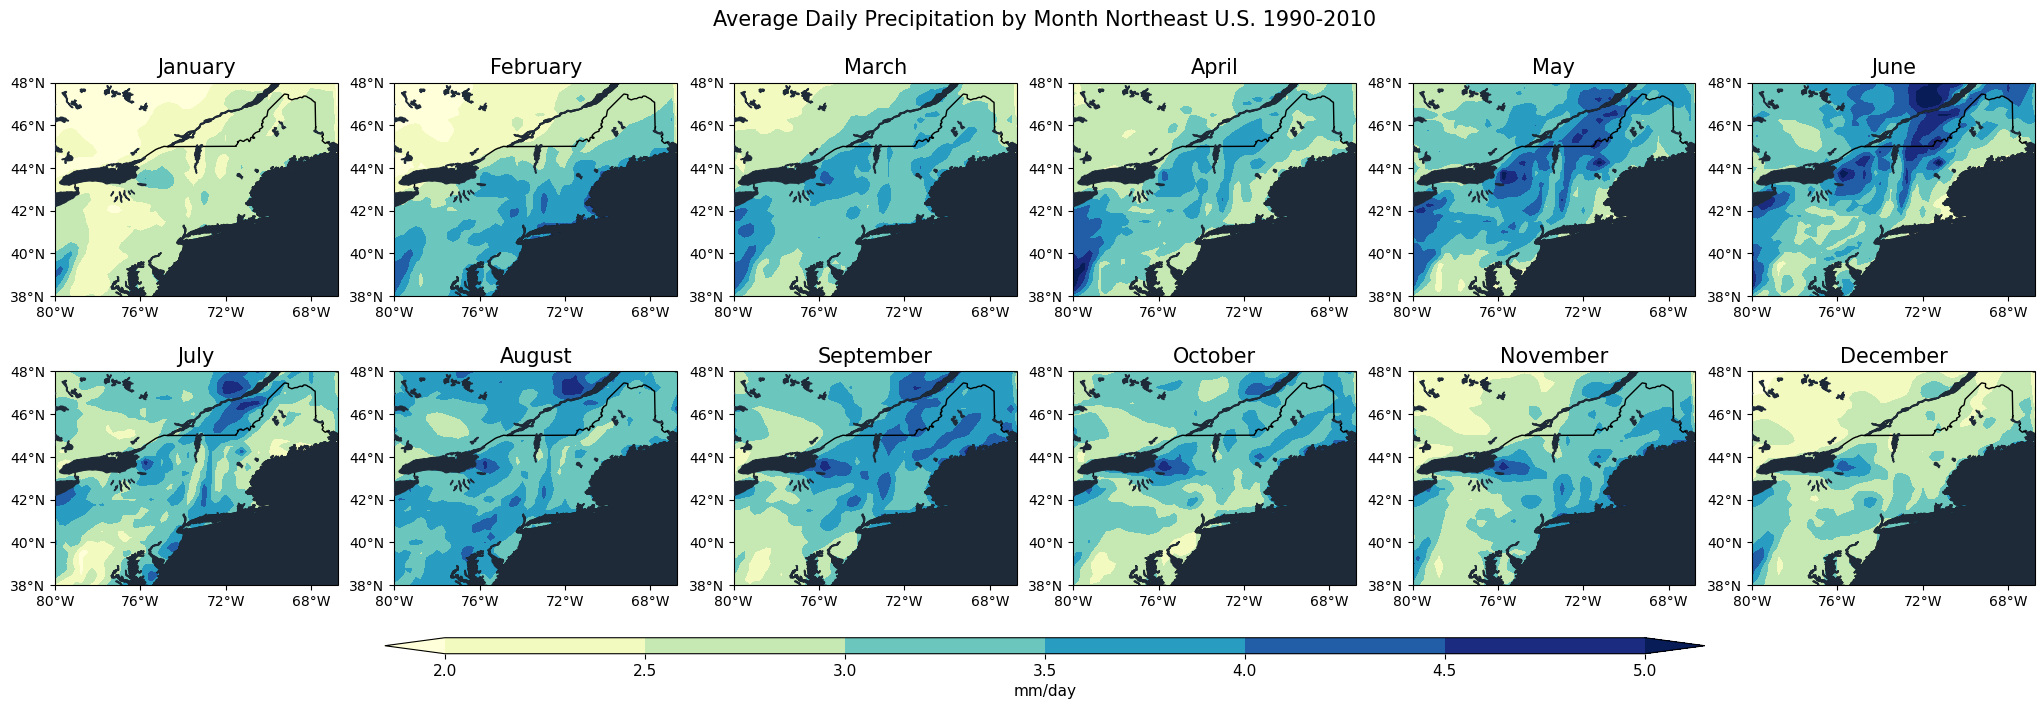

In [6]:
fig, axs = plt.subplots(nrows=2,ncols=6,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-74)},
                        figsize=(22,8))

axs=axs.flatten()

for i,tp in enumerate(dg_tp['month']):

        data=(dg_tp['tp']*1000).sel(month=tp)

        data,lons=add_cyclic_point(data,coord=dg_tp['longitude'])

        cs=axs[i].contourf(lons,dg_tp['latitude'],data, levels=[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
                          transform = ccrs.PlateCarree(),
                          cmap='YlGnBu',extend='both')

        axs[i].set_xticks([-80,-76,-72,-68], crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        
        axs[i].set_yticks([38,40,42,44,46,48], crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        axs[0].set_title('January',fontsize=15)
        axs[1].set_title('February',fontsize=15)
        axs[2].set_title('March',fontsize=15)
        axs[3].set_title('April',fontsize=15)
        axs[4].set_title('May',fontsize=15)
        axs[5].set_title('June',fontsize=15)
        axs[6].set_title('July',fontsize=15)
        axs[7].set_title('August',fontsize=15)
        axs[8].set_title('September',fontsize=15)
        axs[9].set_title('October',fontsize=15)
        axs[10].set_title('November',fontsize=15)
        axs[11].set_title('December',fontsize=15)

        axs[i].coastlines()
        
        axs[i].add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS, zorder=2, color='k')
        axs[i].add_feature(feature.LAKES, zorder=3, color='#1F2A38')
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(labelsize=11)
cbar.set_label(label='mm/day', size='11')

plt.suptitle('Average Daily Precipitation by Month Northeast U.S. 1990-2010',fontsize=15)